In [52]:
import numpy as np
import pandas as pd
import warnings

# Exploração dos dados #

In [53]:
df = pd.read_csv(
    '../data/heart/heart.csv',
    sep = ',',
    encoding = 'iso-8859-1'
)

In [54]:
warnings.filterwarnings("ignore")

## Exploração dos dados ##

In [55]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [56]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [57]:
df.shape

(918, 12)

## Análise das variáveis (Atributos) ##

### Age ###

In [58]:
df['Age'].value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [59]:
df.Age.value_counts().sort_index()

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

#### Gráfico ####

In [60]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
hist_age = px.histogram(data_frame= df, x = "Age", nbins = 60, color_discrete_sequence=["royalblue"])
hist_age.update_layout(
    title="Distribuição de Idades",
    xaxis_title="Idade",
    yaxis_title="Contagem",
    width=600,
    height=400,
    bargap=0.05,  # Espaçamento entre as barras
    bargroupgap=0.1,  # Espaçamento entre os grupos de barras
    font=dict(size=12),  # Tamanho da fonte
    title_font_size=24,  # Tamanho da fonte do título
    title_font_family="Arial",  # Família da fonte do título
    title_font_color="navy",  # Cor do título
    xaxis=dict(
        tickmode="linear",  # Define o modo de exibição dos ticks
        tick0=0,  # Define o primeiro tick
        dtick=10,  # Define o espaçamento entre os ticks
        gridcolor="lightgrey",  # Cor das linhas do grid
    ),
    yaxis=dict(
        gridcolor="lightgrey",  # Cor das linhas do grid
    ),
)
hist_age.show()

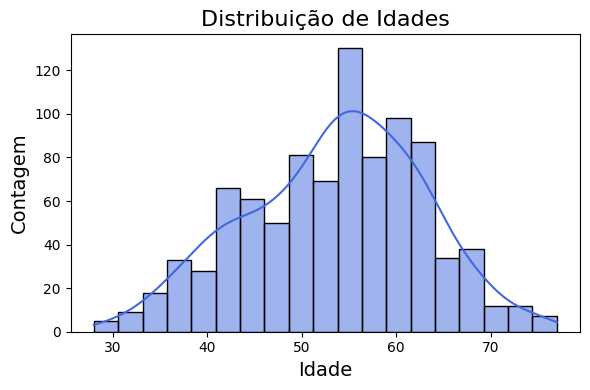

In [62]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', color='royalblue', kde=True, stat='count')
# Personalizar o título e os rótulos dos eixos
plt.title('Distribuição de Idades', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
# Ajustar o layout
plt.tight_layout()
# Mostrar o histograma
plt.show()

### Sex ###

In [63]:
colors = ["#FF69B4", "#6495ED"]

In [64]:
df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

#### Gráfico ####

In [65]:
countplot_sex = px.histogram(df, x='Sex', color='Sex', title='Contagem de Gênero', color_discrete_sequence=colors)
# Personalizar o layout
countplot_sex.update_layout(
    xaxis_title='Gênero',
    yaxis_title='Contagem',
    showlegend=True,
    width=600,
    height=400,
    title_font_size=16,
    font=dict(size=12),
)
# Mostrar o countplot com Plotly
countplot_sex.show()

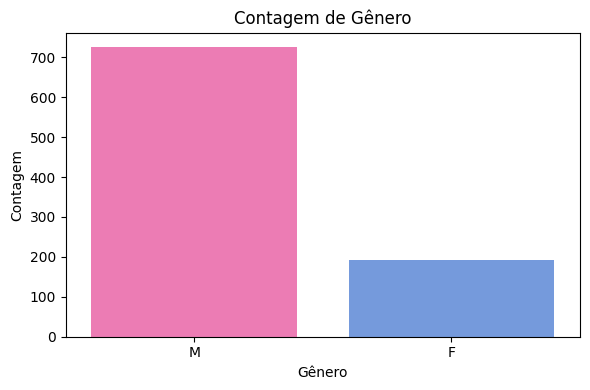

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Sex', data=df, palette=colors, dodge=False, legend=True)
# Personalizar o título e os rótulos dos eixos
plt.title('Contagem de Gênero', fontsize=12)
plt.xlabel('Gênero', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
# Remover a legenda
plt.legend([], frameon=False)
# Ajustar o layout
plt.tight_layout()
# Mostrar o countplot
plt.show()

### Chest Pain Type ###
**Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)**

In [67]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

#### Gráfico ####

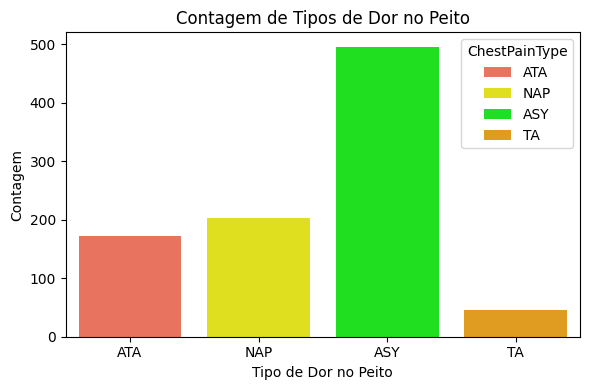

In [68]:
# Definir paleta de cores laranja e vermelho
colors = {
    "TA": "#FFA500",  
    "ATA": "#FF6347", 
    "NAP": "#FFFF00", 
    "ASY": "#00FF00"
}
# Criar o countplot com a paleta de cores personalizada
plt.figure(figsize=(6, 4))
sns.countplot(x='ChestPainType', data=df,hue ='ChestPainType',  palette=colors, dodge=False, legend=True)
# Personalizar o título e os rótulos dos eixos
plt.title('Contagem de Tipos de Dor no Peito', fontsize=12)
plt.xlabel('Tipo de Dor no Peito', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
# Ajustar o layout
plt.tight_layout()
# Mostrar o countplot
plt.show()

In [69]:
# Criar o countplot com Plotly usando a paleta de cores personalizada
countplot_chest_pain = px.histogram(df, x='ChestPainType', color='ChestPainType', title='Contagem de Tipos de Dor no Peito', color_discrete_map=colors)
# Personalizar o layout
countplot_chest_pain.update_layout(
    xaxis_title='Tipo de Dor no Peito',
    yaxis_title='Contagem',
    width=600,
    height=400,
    title_font_size=16,
    font=dict(size=12),
)
# Mostrar o countplot com Plotly
countplot_chest_pain.show()

### Resting BP ###

In [70]:
df['RestingBP'].value_counts().sort_index()

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

#### Gráfico ####

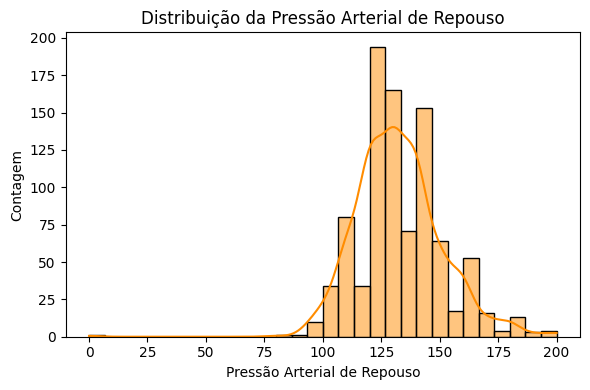

In [71]:
# Criar o histograma com o Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='RestingBP', bins=30, color='darkorange', kde=True, stat='count')
# Personalizar o título e os rótulos dos eixos
plt.title('Distribuição da Pressão Arterial de Repouso', fontsize=12)
plt.xlabel('Pressão Arterial de Repouso', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
# Ajustar o layout
plt.tight_layout()
# Mostrar o histograma
plt.show()

**Encontramos um outlier (pressão arterial = 0) ?** 

### Cholesterol ###

In [72]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

#### Gráfico ####

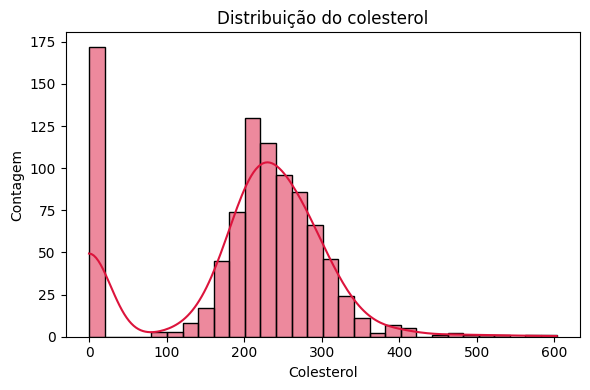

In [73]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Cholesterol', bins=30, color='crimson', kde=True, stat='count')
plt.title('Distribuição do colesterol', fontsize=12)
plt.xlabel('Colesterol', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
plt.tight_layout()
plt.show()

**Encontramos outro outlier, colesterol = 0**

### Fasting BS ###

In [74]:
df['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

#### Gráfico ####

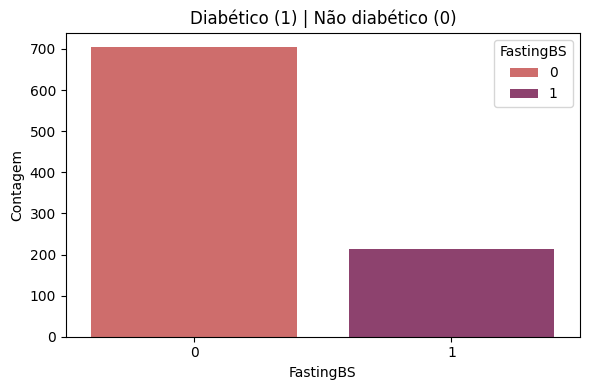

In [75]:
plt.figure(figsize=(6, 4))
sns.countplot(x='FastingBS', hue='FastingBS', data=df, palette='flare', dodge=False, legend=True)
plt.title('Diabético (1) | Não diabético (0)', fontsize=12)
plt.ylabel('Contagem', fontsize=10)
plt.tight_layout()
plt.show()

### Resting ECG ###

In [76]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

#### Gráfico ####

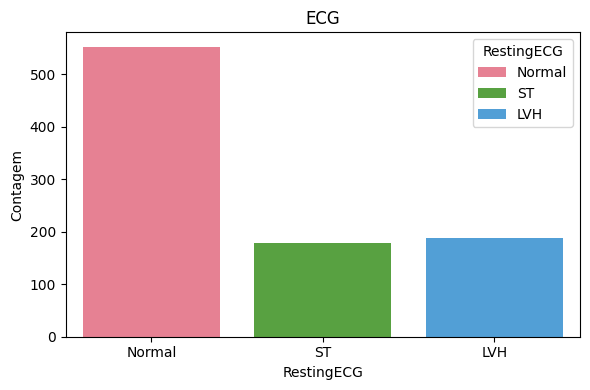

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x='RestingECG', hue='RestingECG', data=df, palette='husl', dodge=False, legend=True)
plt.title('ECG', fontsize=12)
plt.ylabel('Contagem', fontsize=10)
plt.tight_layout()
plt.show()

### Max HR ###

In [78]:
df['MaxHR'].value_counts()

MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

#### Gráfico ####

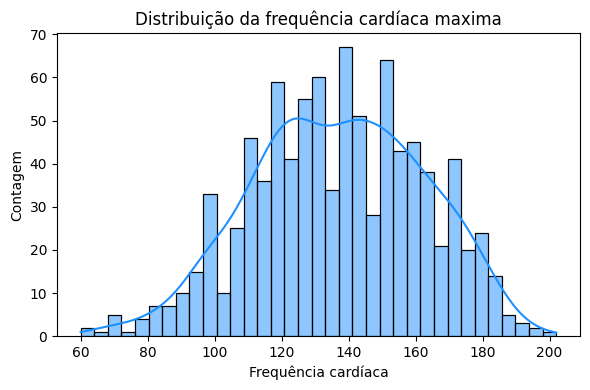

In [79]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='MaxHR', bins=35, color='dodgerblue', kde=True, stat='count')
plt.title('Distribuição da frequência cardíaca maxima', fontsize=12)
plt.xlabel('Frequência cardíaca', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
plt.tight_layout()
plt.show()

### Exercise Angina ###

In [80]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

#### Gráfico ####

In [81]:
pie_chart = px.pie(df, 'ExerciseAngina')

# Personalizar o layout
pie_chart.update_layout(
    title='Proporção de Angina Induzida por Exercício',
    width=600,
    height=400,
    title_font_size=16,
    font=dict(size=12),
    showlegend=True,
)

# Mostrar o gráfico de pizza
pie_chart.show()

### Old Peak ###

In [82]:
df['Oldpeak'].value_counts()

Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

#### Gráfico ####

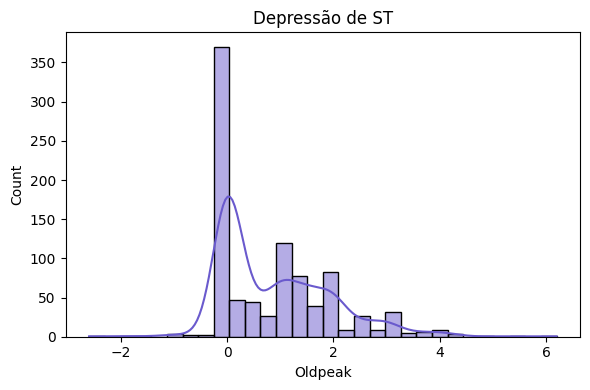

In [83]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Oldpeak', bins=30, color='slateblue', kde=True, stat='count')
plt.title('Depressão de ST', fontsize=12)
# Ajustar o layout
plt.tight_layout()
plt.show()

### ST Slope ###

In [84]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

#### Gráfico ####

In [85]:
pie_chart = px.pie(df, 'ST_Slope')

# Personalizar o layout
pie_chart.update_layout(
    title='Inclinação',
    width=600,
    height=400,
    title_font_size=16,
    font=dict(size=12),
    showlegend=True,
)

# Mostrar o gráfico de pizza
pie_chart.show()

### Heart Disease (atributo alvo) ###

In [86]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

#### Gráfico ####

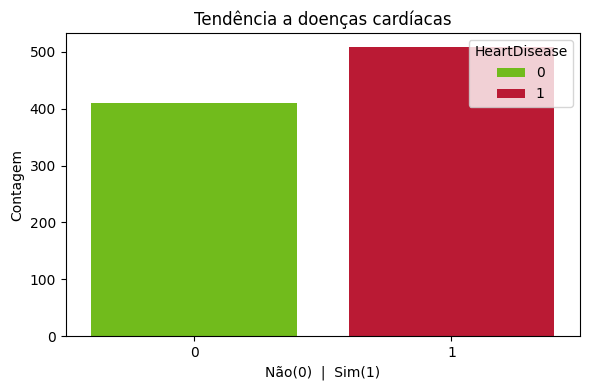

In [87]:
colors = ["#73d601", "#d40022"]
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette=colors, dodge=False, legend=True)
plt.title('Tendência a doenças cardíacas', fontsize=12)
plt.xlabel('Não(0)  |  Sim(1)', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
plt.tight_layout()
plt.show()

## Análise dos tipos de atributos ##

In [88]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

**Valores missing**

In [89]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Tratamento caso houvessem valores missing**

In [90]:
#Excluir valores missing
df2 = df.dropna()

In [91]:
df2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [92]:
#Substituir missing pela média
df2['Age'].fillna(df2['Age'].mean(), inplace = True)

In [93]:
#Substituir por qualquer outro valor
df2['Age'].fillna(10, inplace = True)

## Análise Estatística descritiva ##

In [94]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [95]:
df.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


## Tratando valores incoerentes ##

**Excluindo registro com pressão 0**

In [96]:
df2 = df.loc[df['RestingBP'] != 0]

In [97]:
df2.shape

(917, 12)

In [98]:
df2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Substituindo valores zero do colesterol pela média sem zero**

In [99]:
df2['Cholesterol'].mean()

199.0163576881134

In [100]:
df2['Cholesterol'].replace(0, np.NaN, inplace = True)

In [101]:
df2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [102]:
df2['Cholesterol'].mean()

244.6353887399464

In [103]:
# Substituir valores missing pela média #
df2['Cholesterol'].fillna(df2['Cholesterol'].mean(), inplace = True)

In [104]:
df2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [105]:
df2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [106]:
df2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


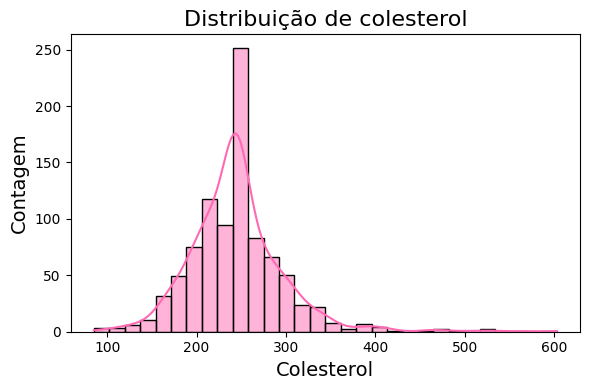

In [109]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df2, x='Cholesterol', bins= 30,color='hotpink', kde=True, stat='count')
# Personalizar o título e os rótulos dos eixos
plt.title('Distribuição de colesterol', fontsize=16)
plt.xlabel('Colesterol', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
# Ajustar o layout
plt.tight_layout()
# Mostrar o histograma
plt.show()

## Análise de outliers ##

**Idade**

In [123]:
boxplot = px.box(df2, y='Age')

boxplot.update_layout(
    title='Distribuição da Idade',
    width=700,
    height=500,
    title_font_size=20,
    font=dict(size=12),
    xaxis_title=None,
    yaxis_title='Idade',
)
boxplot.show()

**Pressão sanguínea em repouso**

In [120]:
boxplot = px.box(df2, y='RestingBP')

boxplot.update_layout(
    title='Distribuição da pressão',
    width=700,
    height=500,
    title_font_size=20,
    font=dict(size=12),
    xaxis_title=None,
    yaxis_title='Pressão',
)
boxplot.show()

**Colesterol**

In [117]:
boxplot = px.box(df2, y='Cholesterol')

boxplot.update_layout(
    title='Distribuição do colesterol',
    width=700,
    height=500,
    title_font_size=20,
    font=dict(size=12),
    xaxis_title=None,
    yaxis_title='colesterol',
)
boxplot.show()

**Frequência cardíaca máxima**

In [119]:
boxplot = px.box(df2, y='MaxHR')

boxplot.update_layout(
    title='Distribuição da frequência',
    width=700,
    height=500,
    title_font_size=20,
    font=dict(size=12),
    xaxis_title=None,
    yaxis_title='Frequência cardíaca máxima',
)
boxplot.show()

### Salvando (Exportando) o DataFrame Tratado ###

In [124]:
df2.to_csv('../data/heart/processed/heart.csv', sep = ';', encoding = 'utf-8', index = False)